# D207 Exploratory Data Analysis - Medical Data Performance Assessment
>Andrew Butler   
Student Id: 001053557   
MSDA   
Mentor: Linda Howell   

## A.  Describe a real-world organizational situation or issue in the Data Dictionary you chose
__1. Provide one question that is relevant to your chosen data set. You will answer this question later in the task through an analysis of the cleaned data, using one of the following techniques: chi- square, t-test, or analysis of variance (ANOVA).__
> Is there a correlation between the amount of doctor visits a patient receives during their initial admission and instances of re-admission?

__2. Explain how stakeholders in the organization could benefit from an analysis of the data.__
> This analysis could benefit stake holes in one of two ways:
>> a. If there is a negative correlation, it could indicate that more doctor visits then necessary are being performed, which could be spread more evenly among patients.
>> b. If a positive correlation is found, it could indicate that patient re-admission could be reduced by increasing the number of visits per patient.

__3. Identify all of the data in your data set that are relevant to answering your question in part A1.__
> The relevant data for answering this question is weather or not the patient was re-admitted, and the number of visits the patient received during their initial admission.

## B.  Describe the data analysis by doing the following:
__1.  Using one of the following techniques, write code (in either Python or R) to run the analysis of
the data set:__
>- chi-square
>- t-test
>- ANOVA

__2.  Provide the output and the results of any calculations from the analysis you performed.__

> The code and output can be seen in the cells below.

__3.  Justify why you chose this analysis technique.__
> I chose to use a t-test for analysis because we are comparing the amount of doctor visits, between patients who were re-admitted and those who were not, and doctor visits follows a normal distribution. 

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('medical_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [5]:
df['Doc_visits'].unique()

array([6, 4, 5, 7, 3, 2, 8, 9, 1], dtype=int64)

In [6]:
df['Doc_visits'].describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

<AxesSubplot:xlabel='Doc_visits', ylabel='Count'>

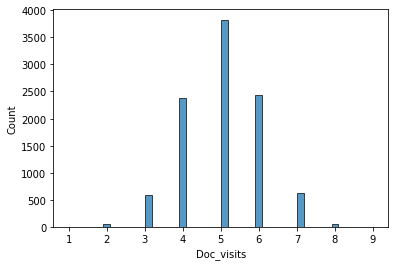

In [7]:
sns.histplot(data=df, x='Doc_visits')


In [8]:
df['ReAdmis'].value_counts()

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

In [9]:
stats.ttest_ind(df.loc[df['ReAdmis'] == 'Yes', 'Doc_visits'],
               df.loc[df['ReAdmis'] == 'No', 'Doc_visits'])

Ttest_indResult(statistic=0.02456618236831195, pvalue=0.980401483979056)

<AxesSubplot:xlabel='ReAdmis', ylabel='Doc_visits'>

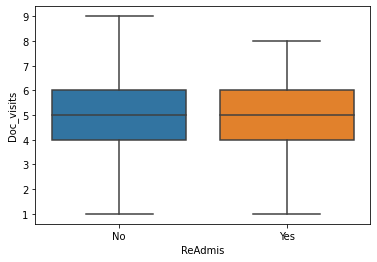

In [10]:
sns.boxplot(data=df, x='ReAdmis', y='Doc_visits')

## C.  Identify the distribution of two continuous variables and two categorical variables using univariate statistics from your cleaned and prepared data.
> ___1. Represent your findings in Part C, visually as part of your submission.___

- ###  Continuous

<AxesSubplot:xlabel='VitD_levels', ylabel='Count'>

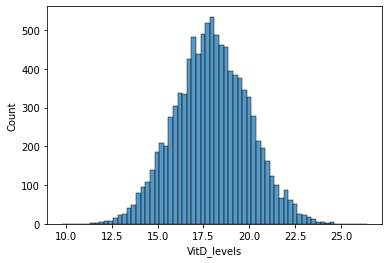

In [11]:
sns.histplot(data=df, x = 'VitD_levels')

The Vitamin D levels of patients follow a normal distribution.

<AxesSubplot:xlabel='Income', ylabel='Count'>

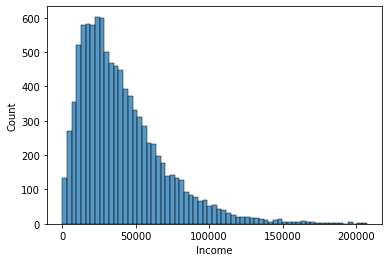

In [12]:
sns.histplot(data = df, x = 'Income')

The distribution of income is positively skewed.

- ###  Catagorical

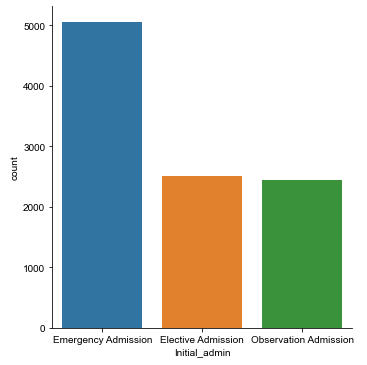

In [13]:
sns.catplot(data= df, x= 'Initial_admin', kind='count')
sns.set(font_scale=.75)

A proportionally significant amount of total patient admissions, are due to emergency admissions.

<AxesSubplot:xlabel='Count', ylabel='Overweight'>

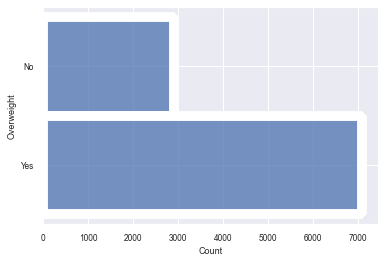

In [14]:
sns.histplot(data = df, y ='Overweight')

A large proportion of patients admitted are overweight.

## D.  Identify the distribution of two continuous variables and two categorical variables using bivariate statistics from your cleaned and prepared data.
> __1. Represent your findings in Part D, visually as part of your submission.__

- ###  Continuous

<AxesSubplot:xlabel='Age', ylabel='Initial_days'>

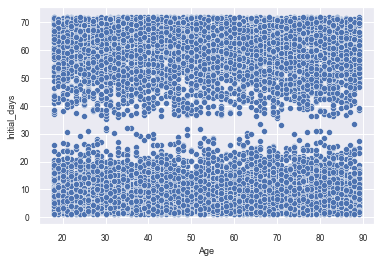

In [15]:
sns.scatterplot(data= df, x = 'Age', y = 'Initial_days')

It does not appear that any correlation exists between a patients age and the number of days of the initial addmission.

- ###  Catagorical

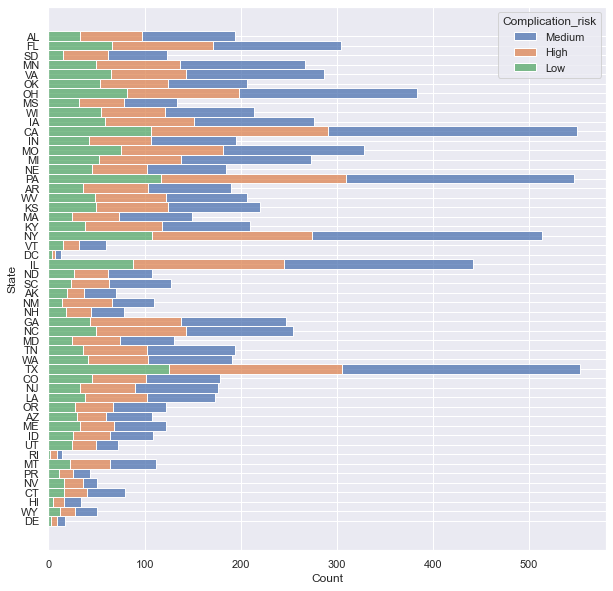

In [17]:
sns.histplot(y="State", hue="Complication_risk", data=df, stat="count", multiple="stack")
sns.set(font_scale=.75)
sns.set(rc={'figure.figsize':(10, 10)})

The proportional risk of complications varies significantly depending on the patients state of residence.

## E.  Summarize the implications of your data analysis by doing the following:
__1.  Discuss the results of the hypothesis test.__
> Due to the high p value that resulted from the t_test, it appears the null hypothesis is correct and there is no significant correlation between the amount of doctor visits a patient receives during their initial admission and whether or not they are re-admitted.

__2.  Discuss the limitations of your data analysis.__
> This analysis is limited by the fact that, while the number of doctor visits is known, we do not know the length of each visit, or what treatment or testing was performed during each visit. We also do not know if the patient was reason for admission was related to a chronic condition. These factors could effect weather or not the patients underlying condition was properly treated, which could lead to a higher rate of re-admission.
> Some limitations inherent to the t-test are that we are assuming that the data provided is reliable, and that it can only show us a correlation in varrience between groups without accounting for other enviromental factors that could affect results("pros and cons", 2019)

__3.  Recommend a course of action based on your results.__
> Since the hypothesis was disproven, further analysis should be conducted to determine if other factors present in the data set could have a greater effect on patient readmission.

## F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the tool(s) used.
> https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=214fd83a-d93c-4596-8ba2-ae8200504f6a

## G.  Reference the web sources used to acquire segments of third-party code to support the analysis.
- Vibhor Nigam (Apr 1, 2018) Statistical Tests — When to use Which ?, Towards Data Science https://towardsdatascience.com/statistical-tests-when-to-use-which-704557554740

- Javier Fernandez (Apr 11, 2020) The statistical analysis t-test explained for beginners and experts, Towards Data Science https://towardsdatascience.com/the-statistical-analysis-t-test-explained-for-beginners-and-experts-fd0e358bbb62

- (accessed Apr 2, 2022) Independent T-test, Python for Data Science https://www.pythonfordatascience.org/independent-samples-t-test-python/

- Erik Marsja (Aug 10, 2020) How to Perform a Two-Sample T-test with Python: 3 Different Methods, Marsja.se https://www.marsja.se/how-to-perform-a-two-sample-t-test-with-python-3-different-methods/

## H. Sources
> Pros and cons admin (Feb 16, 2019) Pros and Cons of T-Test, Pros an Cons https://prosancons.com/education/pros-and-cons-of-t-test/